<a href="https://colab.research.google.com/github/RJuro/am-21/blob/main/AM2022_peergrade1_ed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anvendt Matematik 2022 - Peergrade Opgave1

- Du må gerne arbejde sammen med din gruppe eller andre.
- Din aflevering er individuel
- Du skal selv oprette jupyter celler
- Brug notebooks fra undervisningen som eksempel mht. navngivning af objekter, kommentering af kode etc.
- Opgaven er i den mere udfordrende ende og kan ikke løses ved ”bare” at reproducere fra undervisningen. Der er dog ingen nye typer af beregniger/matematik, som ikke blev præsenteret i undervisningen.
- Der afleveres som **PDF**!


#1. FjordBikes

![](https://source.unsplash.com/lYL_IlgaJVc)

Varsomheden FjordBikes vil gerne udvide deres tilbud med en ny type el-cykel.

Økonomiafdelingen har leveret tal for hvad en ny produktionslinje vil koste og hvilken omsætning de kan forvente.

- Omkostningsfunktionen er ifølge deres tal $ C(x) = 5.576x + 229600 $; 
- Indtægter kan forventes at være $ R(x) = 10.168x $

$C(x)$ og $R(x)$ kan skrives som $y$ og er givet i kr. ; $x$ beskriver antal af producerede cykler.

Din opgave er at bruge forskellige løsningstilgange til at finde deres Break-Even punkt.

In [1]:
# Pakker, der skal bruges i opgaven

import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

## 1.1 Grafisk løsning

Lav en plot, som viser deres Break-Even punkt. 
OBS: Du kan definere 1000 x-værdier mellem 0 og 60000.

In [3]:
x_plot = np.linspace(0, 60000, num = 1000)

In [5]:
y_plot_1 = 229600 + 5.576*x_plot
y_plot_2 = 10.168*x_plot

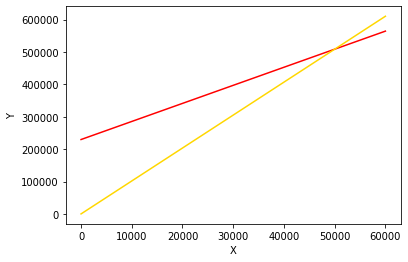

In [6]:
# Plot

plt.xlabel('X')
plt.ylabel('Y')

plt.plot(x_plot, y_plot_1, color = "red") # Cost
plt.plot(x_plot, y_plot_2, color = "gold") # Revenue

## 1.2 Rækkeoperationer

Definér augmented matrix ud fra de 2 funktioner. Brug rækkeoperationer til at omskrive til trappeform (række-echelon form) og finde en løsning.

In [7]:
augmented = np.array([[5.576, -1, -229600], 
         [10.168, -1, 0]])

In [8]:
augmented[0] = augmented[0] / augmented[0,0]

In [14]:
augmented

array([[     1.,      0.,  50000.],
       [     0.,      1., 508400.]])

In [10]:
augmented[1] = augmented[1] - (augmented[1,0]*augmented[0])

In [12]:
augmented[1] = augmented[1] / augmented[1,1]

In [13]:
augmented[0] =  augmented[0] - (augmented[0,1]*augmented[1])

## 1.3a Løsning via matrix ligning

Opstil matrix ligning

$A\vec{x} = \vec{b}$


Du skal bruge følgende python objekter:


*   $A$: `A1`
*   $A^{-1}$: `A1_inv`
*   $\vec{b}$: `vector_b1`
* $\vec{x}$: `vector_x1`

In [15]:
A1 = np.array([[5.576, -1],
                [10.168, -1]])

In [32]:
vector_b1 = np.array([[-229600], 
         [0]]).reshape(-1,1)

In [33]:
vector_x1 = np.linalg.inv(A1) @ vector_b1

In [34]:
vector_x1

array([[ 50000.],
       [508400.]])

# 1.3b Lavere faste omkostninger

Deres aktuelle faste omkostniner er $229600 kr.$ 
Hvor langt skal disse ned, således man kan opnå Break-Even ved at producere $40.000$ cykler.

Brug matrix regning og følgende nye objekter:

*   $\vec{b_n}$: `vector_b1_ny`
* $\vec{x_n}$: `vector_x1_ny`

In [35]:
40000 * 10.168

406719.99999999994

In [36]:
vector_x1_new = np.array([[ 40000.],
       [406720.]]).reshape(-1,1)

In [37]:
b1_new = A1 @ vector_x1_new

In [38]:
b1_new

array([[-183680.],
       [     -0.]])

# 2. Investering

![](https://source.unsplash.com/9opiHRPIvR0)

Jonas startede på AAU i september 2020. Han har igennem gymnasietiden og 1 semester på bachelor haft en del fritidsjobs samt indtægter som Influencer på Instagram og andre platforme. I alt har han sparet $165000 kr.$ som han investerede i januar 2021. Han har lært en del om investering og fordelte penge på aktier, ETF og investeringsforeninger.

Efter et år har det givet følgende afkast: aktier 9%, ETF 5.6%, investeringsforeninger 5%. I alt tjener Jonas $10470 kr.$ efter et år. Vi ved derudover, at der blev investeret $20000$ mere i ETF end Investeringsforeninger.

Hvad var fordelingen i hans portføjle?

- Opstil 3 ligninger med 3 ubekendte
- Omskriv til matrix ligning af type
$A\vec{x} = \vec{b}$
- Beregn $\vec{x}$

Du skal bruge følgende python objekter:


*   $A$: `A2`
*   $A^{-1}$: `A2_inv`
*   $\vec{b}$: `vector_b2`
* $\vec{x}$: `vector_x2`

$x + y + z = 165000$

$0.09*x + 0.056*y + 0.05*z = 10470$

$y - z = 20000$


In [23]:
A2 = np.array([[1,1,1],
              [0.09,0.056,0.05],
              [0,1,-1]])

In [39]:
vector_b2 = np.array([165000,10470, 20000]).reshape(-1,1)

In [40]:
vector_x2 = np.linalg.inv(A2) @ vector_b2

In [41]:
vector_x2

array([[45000.],
       [70000.],
       [50000.]])